In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path='D:/Projects/Capstone/'
filename=path+'Building fire-weather.csv'
building_fire=pd.read_csv(filename,encoding='ISO-8859-1',na_filter=True)


In [26]:
building_fire.head()

,Date_time,Building fires,Temperature,Dew Point,Humidity,Wind speed
0,1/1/2013 1:00,1,-1.2,-4.0,79.0,6.0
1,1/1/2013 5:00,1,-9.4,-13.0,71.0,2.0
2,1/1/2013 16:00,1,-12.0,-17.0,64.0,4.0
3,1/1/2013 18:00,1,-12.9,-17.0,71.0,4.0
4,1/1/2013 19:00,2,-13.8,-17.0,72.0,6.0


In [45]:
building_fire.columns=['Date_time','building_f','Temp','Dew_P','Hum','Wind']


In [27]:
building_fire.shape

(5856, 6)

In [35]:
building_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 6 columns):
Date_time         5856 non-null object
Building fires    5856 non-null int64
Temperature       5750 non-null float64
Dew Point         5484 non-null float64
Humidity          5772 non-null float64
Wind speed        5692 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 274.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280082CA6A0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028008470320>]], dtype=object)

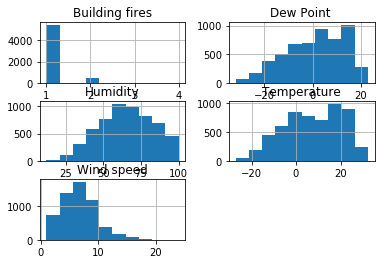

In [29]:
building_fire.hist()

In [37]:
building_fire.mean()

Building fires     1.078381
Temperature        7.510539
Dew Point          0.713166
Humidity          65.118330
Wind speed         6.658117
dtype: float64

In [38]:
 building_fire=building_fire.fillna(building_fire.mean())

In [39]:
building_fire.info

<bound method DataFrame.info of             Date_time  Building fires  Temperature  Dew Point   Humidity  \
0       1/1/2013 1:00               1    -1.200000        -4.0      79.0   
1       1/1/2013 5:00               1    -9.400000       -13.0      71.0   
2      1/1/2013 16:00               1   -12.000000       -17.0      64.0   
3      1/1/2013 18:00               1   -12.900000       -17.0      71.0   
4      1/1/2013 19:00               2   -13.800000       -17.0      72.0   
5       1/2/2013 5:00               1   -12.700000       -15.0      82.0   
6       1/2/2013 9:00               1   -14.900000       -17.0      78.0   
7      1/2/2013 13:00               1   -14.900000       -20.0      64.0   
8      1/2/2013 15:00               1   -15.300000       -22.0      53.0   
9      1/2/2013 18:00               1   -17.700000       -23.0      63.0   
10      1/3/2013 0:00               1   -19.500000       -24.0      67.0   
11     1/3/2013 15:00               1   -15.900000      

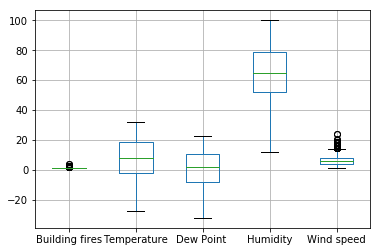

In [30]:
building_fire.boxplot()

In [31]:
from sklearn.linear_model import LinearRegression

In [46]:
Ic=LinearRegression()
Ic.fit(X=building_fire[['Temp']],y=building_fire['building_f'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
# regression parameters intercept is beta0 and coef_ is beta1
print(Ic.intercept_, Ic.coef_)

1.07774714759 [  8.44147052e-05]


In [48]:
import statsmodels.formula.api as smf
model=smf.ols(formula='building_f~Temp+Dew_P+Hum+Wind',data=building_fire)
ir=model.fit()
ir.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             building_f   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.860
Date:                Wed, 20 Feb 2019   Prob (F-statistic):            0.00390
Time:                        12:52:07   Log-Likelihood:                -995.77
No. Observations:                5856   AIC:                             2002.
Df Residuals:                    5851   BIC:                             2035.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1790      0.074     15.944      0.000       1.034       1.324
Temp          -0.0028      0.003     -0.905      0.365      -0.009       0.003
Dew_P          0.0031      0.003      0.893      0.372      -0.004       0.010
Hum           -0.0014      0.001     -1.762      0.078      -0.003       0.000
Wind           0.0018      0.001      1.428      0.153      -0.001       0.004
==============================================================================
Omnibus:                     4628.407   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77965.162
Skew:                           3.840   Prob(JB):                         0.00
Kurtosis:                      19.141   Cond. No.                     1.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""